#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 5


### Name: Bozhou Yan


### Due: Nov. 27, 2019


## Goal:  The goal of this homework is to practice implementing PCA and NMF in Sci-kit learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import PCA, NMF

## 0. Getting Data

**For this part there is nothing to implement**

However, please review the documentation for [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to see what these functions do.  Here is more information on the [dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).


Recall that for dimensionality reduction we form the matrix
$$
{\bf X} = [{\bf x}_1; {\bf x}_2; \ldots; {\bf x}_N] \in \mathbb{R}^{d\times N}
$$
where ${\bf x}_i \in \mathbb{R}^d$ is the dimension of the data and $N$ is the number of training points.  We want to find a **dictionary** matrix ${\bf W}$ and a **code** matrix ${\bf Z}$ such that ${\bf X} \approx {\bf WZ}$.  Dimensionality reduction comes in when we select ${\bf W} \in \mathbb{R}^{d \times q}$ and ${\bf Z} \in \mathbb{R}^{q\times N}$ with $q \ll d$.

In [5]:
# Load in the data.
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

tfidf_vectorizer = TfidfVectorizer(min_df = 30)

# The data matrix X and the targets y.
X = (tfidf_vectorizer.fit_transform(newsgroups_train.data).T).todense()
y = newsgroups_train.target

(d, N) = X.shape
print("X has shape (d, N) = ", X.shape)

# The reduced dimension.
q = 5

X has shape (d, N) =  (1771, 2369)


The data has dimension $d = 1771$.  We will reduce this to dimension $q = 5$.

## 1. Training with PCA

### Part (a)
Using the PCA implemented in Sci-Kit learn, obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $q = 5$.  Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) carefully.  In particular, make sure you are computing the correct ${\bf W}$ and ${\bf Z}$.

In [36]:
## TO DO STARTS HERE ##
X_t=X.T
pca=PCA(n_components=5)
Z=pca.fit_transform(X_t).T

W=pca.components_.T


## TO DO ENDS HERE ##

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


### Part (b)

The matrix ${\bf Z} = [{\bf z}_1,\ldots,{\bf z}_N]$ is the matrix of the reduced data.  Make a scatter plot of the data projected onto its first two principal components.  In other words, form a scatter plot of all the ${\bf z}_i$ with the first component as the $x$-axis and the second component as the $y$-axis.  Set the color bar so that the points are colored corresponding to their target label ${\bf y}$ (which was defined earlier in the code).

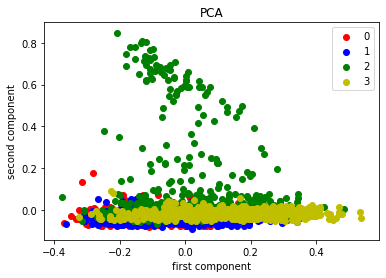

COMPONENT 1
not we in god is and to that of the

COMPONENT 2
n3jxp chastity shameful cadre dsl cs gordon banks geb pitt

COMPONENT 3
not hell christians faith that his jesus he we god

COMPONENT 4
uga georgia apple god ai university of mac edu the

COMPONENT 5
his god dod sun in he of was the com



In [37]:
## TO DO STARTS HERE ##

z_x0=[]
z_x1=[]
z_x2=[]
z_x3=[]
z_y0=[]
z_y1=[]
z_y2=[]
z_y3=[]
Z_t=np.asarray(Z.T)

for i in range(0,N):
    if y[i]==0:
        z_x0=np.insert(z_x0,len(z_x0),Z_t[i][0])
        z_y0=np.insert(z_y0,len(z_y0),Z_t[i][1])
    elif y[i]==1:
        z_x1=np.insert(z_x1,len(z_x1),Z_t[i][0])
        z_y1=np.insert(z_y1,len(z_y1),Z_t[i][1])
    elif y[i]==2:
        z_x2=np.insert(z_x2,len(z_x2),Z_t[i][0])
        z_y2=np.insert(z_y2,len(z_y2),Z_t[i][1])
    elif y[i]==3:
        z_x3=np.insert(z_x3,len(z_x3),Z_t[i][0])
        z_y3=np.insert(z_y3,len(z_y3),Z_t[i][1])
plt.scatter(z_x0,z_y0,c='r',label='0')
plt.scatter(z_x1,z_y1,c='b',label='1')
plt.scatter(z_x2,z_y2,c='g',label='2')
plt.scatter(z_x3,z_y3,c='y',label='3')

plt.xlabel('first component')
plt.ylabel('second component')
plt.title('PCA')
plt.legend()
plt.show()

## TO DO ENDS HERE ##

# Also print out the first q components.  There is nothing to do for this part.
loadings = W.T
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(loadings[i])

    print ('COMPONENT ' + str(i + 1))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

### Part (c)

Recall that for PCA the dictionary and code matrices ${\bf W},{\bf Z}$ can be found using either an eigenvalue decomposition or the SVD.  Suppose the matrix ${\bf X}$ is centered so that 
$$
\frac{1}{N}\sum_{i = 1}^N {\bf x}_i = \vec{0} \in \mathbb{R}^d
$$
The covariance matrix is defined to be ${\bf C} = {\bf XX}^T$.  The eigen-decomposition of ${\bf C} = {\bf W\Sigma W}^T$ gives the matrices ${\bf W}$ and ${\bf Z} = {\bf \Sigma W}^T$.  Here
$$
{\bf \Sigma} = \begin{bmatrix}
\sigma_1^2 & & \\
 & \ddots & \\
 & & \sigma_d^2
\end{bmatrix}
$$
is the diagonal matrix with eigenvalues $\sigma_i^2$.  The proportion of explained variance by our low-dimensional projection is defined to be
$$
\mathrm{PV}(q) := \frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^d \sigma_i^2}
$$
Make a plot of $\mathrm{PV}(q)$ versus $q$ for $q = 1,\ldots,1000$.  For this you do not need to implement the procedure above on your own, but can instead use the Sci-kit learn PCA.  In particular, look at the `explained_variance_ratio_` attribute.  Make sure that your plot is clear with a title and labeled axes.

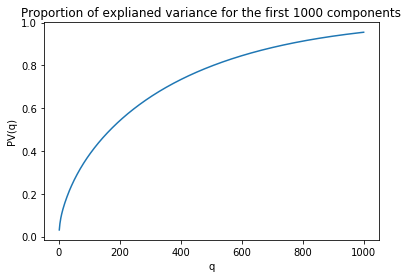

In [13]:
## TO DO STARTS HERE ##
pv=np.ndarray(shape=(1000,))
eigenvalue_sum=sum(pca_new.explained_variance_)
pca_new=PCA()
pca_new.fit(X_t)
for i in range(1,1001):
    pv[i-1]=sum(pca_new.explained_variance_[0:i])/eigenvalue_sum
x_axis=np.linspace(1,1000,1000)
plt.plot(x_axis,pv)
plt.xlabel('q')
plt.ylabel('PV(q)')
plt.title('Proportion of explianed variance for the first 1000 components')
plt.show()
## TO DO ENDS HERE ##

## 2. Training with NMF

### Part (a)
Similarly to PCA in Part 1, use the NMF implemented in Sci-Kit learn to obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $q = 5$.  Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) carefully.  In particular, make sure you are computing the correct ${\bf W}$ and ${\bf Z}$.

In [19]:
## TO DO STARTS HERE ##
nmf=NMF(n_components=5)
Z=nmf.fit_transform(X_t).T
W=nmf.components_.T


## TO DO ENDS HERE ##

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


### Part (b)

Define the reconstruction error
$$
R(q) := \frac{1}{2}\|{\bf X} - {\bf WZ}\|_F^2
$$
where
$$
\|M\|_F^2 = \sum_{i = 1}^m \sum_{j = 1}^k M_{ij}^2
$$
is the Frobenius norm of $M \in \mathbb{R}^{m \times k}$.  Make a plot of the reconstuction error $R(q)$ versus $q$ for $q = 5, 10, 15, \ldots, 50$.  Make sure the plot is clear with labeled axes and an appropriate title.  For this you can just use the `reconstruction_err_` attribute provided in Sci-kit learn.

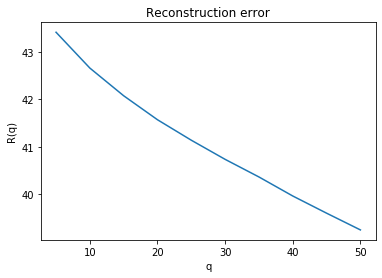

In [21]:
## TO DO STARTS HERE ##
rec_err=pv=np.ndarray(shape=(10,))
x_axis=np.linspace(5,50,10)
for i in range(0,10):
    new_model=NMF(n_components=int(x_axis[i]))
    new_model.fit(X_t)
    rec_err[i]=new_model.reconstruction_err_
plt.plot(x_axis,rec_err)
plt.xlabel('q')
plt.ylabel('R(q)')
plt.title('Reconstruction error')
plt.show()

## TO DO ENDS HERE ##

## 3.  Interpreting the principal components

Consider the dataset
$$
{\bf X} = [{\bf x}_1; {\bf x}_2; {\bf x}_3] = \begin{bmatrix}
1 & 2 & 3\\
1 & 2 & 3
\end{bmatrix}
$$
Although this data is 2-dimensional, it actually lives on the 1 dimensional line $x_1 = x_2$.  Without doing any computation, answer the following with short explanations:

1.  What is the first principal component (i.e. first eigenvector)?  

2.  What is the second principal component?

3.  What is the proportion of variance explained by only the first principal component?

4.  What are the matrices ${\bf W}, {\bf Z}$ when $q = 1$?  Normalize the columns of ${\bf W}$ to have unit norm.

**Answer goes here**

1. $(1,1)^T$ , since x1, x2 and x3 are all on this line
2. $(1,-1)^T$, this and $(1,1)^T$ form a basis.
3. 100% since the other eigenvalue is 0.
4. $W= (sqrt(.5),sqrt(.5))^T$ and $Z= (sqrt(2),2*sqrt(2),3*sqrt(2))$

## 4.  Reconstruction error and low-dimensional data

More generally suppose that we can write ${\bf X} = {\bf uv}^T$ for some vectors ${\bf u} \in \mathbb{R}^{d},{\bf v} \in \mathbb{R}^N$.  What is the first principal component (normalized to have unit norm)? What is the minimum dimension $q$ we need to have zero reconstruction error?  

**Answer goes here**

Since $X = u v^T$, $XX^T =uv^T vu^T=u(v^Tv)u^T=c*uu^T$, where c is a scalar. Therefore the first principal component is simply u normalized. Since the data is generated with a single vector u (X has rank 1), q=1 is enough.